## Support Vector Machine



**This Dataset is from UCI dataset and the name of the Dataset is "breast_cancer"**

### Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and read the dataset

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.data", header = None)
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10
605,352431,10,5,10,3,5,8,7,8,3,4
139,1183246,1,1,1,1,1,?,2,1,1,2
444,780555,5,1,1,6,3,1,2,1,1,2
265,1182404,5,1,4,1,2,1,3,2,1,2
551,1289391,1,1,1,1,2,1,3,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
143,1184184,1,1,1,1,2,5,1,1,1,2
223,1226612,7,5,6,3,3,8,7,4,1,4
616,1042252,3,1,1,1,2,1,2,1,1,2
552,1299924,3,2,2,2,2,1,4,2,1,2


## Since the dataset does not contain an header, so we have to add header manually

**Firstly,we create a list "headers" that contain all the column names in oder by using dataframe.columns = headers**
**to replace the headers by the list created**

In [3]:
# Create a header list
headers = ["Sample code number", "Clump Thickness", "Uniformity of Cell Skize", "Uniformity of Cell Shape",
           "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses","Class"]

In [4]:
print("headers\n", headers)

headers
 ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Skize', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


### We replace the headers and recheck our dataframe

In [5]:
df.columns = headers

In [6]:
df.head(20)

,Sample code number,Clump Thickness,Uniformity of Cell Skize,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [7]:
df.tail(10)

,Sample code number,Clump Thickness,Uniformity of Cell Skize,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

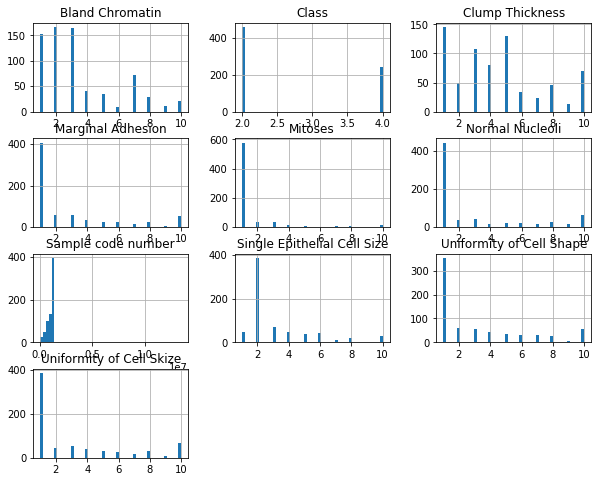

In [9]:
df.hist(bins = 50, figsize = (10, 8))
plt.show()

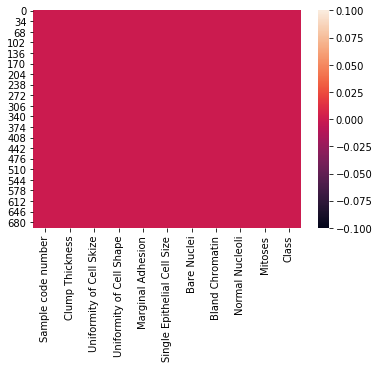

In [10]:
sns.heatmap(df.isnull())

### Basic insight of the Dataset

In [11]:
df.shape

(699, 11)

In [12]:
df.columns.values

array(['Sample code number', 'Clump Thickness',
       'Uniformity of Cell Skize', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype=object)

In [13]:
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Skize     699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [15]:
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Skize        int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Handling Missing Data

In [16]:
missing_data = df.isnull()
missing_data

,Sample code number,Clump Thickness,Uniformity of Cell Skize,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


### Check the missing_data per columns

In [17]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Sample code number
False    699
Name: Sample code number, dtype: int64

Clump Thickness
False    699
Name: Clump Thickness, dtype: int64

Uniformity of Cell Skize
False    699
Name: Uniformity of Cell Skize, dtype: int64

Uniformity of Cell Shape
False    699
Name: Uniformity of Cell Shape, dtype: int64

Marginal Adhesion
False    699
Name: Marginal Adhesion, dtype: int64

Single Epithelial Cell Size
False    699
Name: Single Epithelial Cell Size, dtype: int64

Bare Nuclei
False    699
Name: Bare Nuclei, dtype: int64

Bland Chromatin
False    699
Name: Bland Chromatin, dtype: int64

Normal Nucleoli
False    699
Name: Normal Nucleoli, dtype: int64

Mitoses
False    699
Name: Mitoses, dtype: int64

Class
False    699
Name: Class, dtype: int64



### How many missing_data do we have

In [18]:
missing_data_count = df.isnull().sum()
missing_data_count

Sample code number             0
Clump Thickness                0
Uniformity of Cell Skize       0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Descriptive Statistic

In [19]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Skize,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Skize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### df.corr()

In [21]:
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Skize,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Skize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


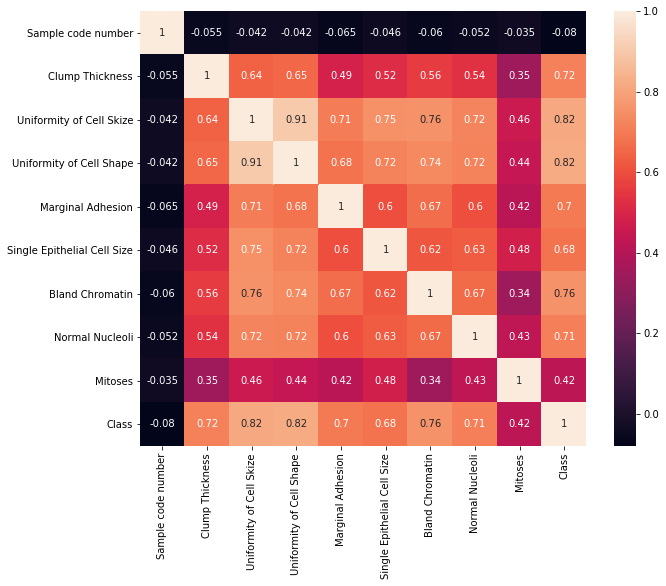

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Continous Numerical Variable

**Positive linear relationship**

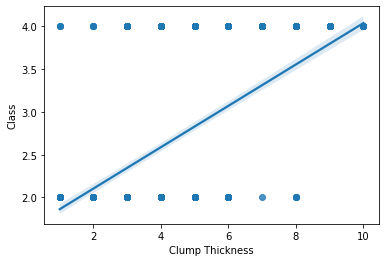

In [23]:
sns.regplot( x = "Clump Thickness", y = "Class", data = df)

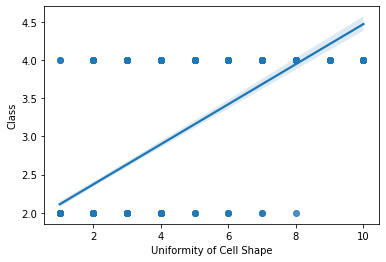

In [24]:
sns.regplot(x = "Uniformity of Cell Shape", y = "Class", data = df)

### Categorical Variable

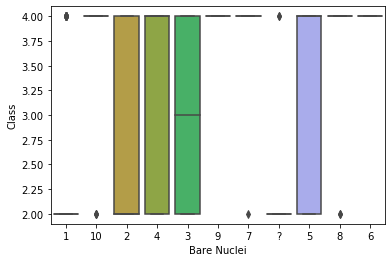

In [25]:
sns.boxplot(x = "Bare Nuclei", y = "Class", data = df)

In [26]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [27]:
df['Bare Nuclei'].replace("?", np.nan, inplace = True)
df['Bare Nuclei'].head()

0     1
1    10
2     2
3     4
4     1
Name: Bare Nuclei, dtype: object

In [28]:
df['Bare Nuclei'].replace(np.nan, 10, inplace = True)

In [29]:
df[['Bare Nuclei']] = df[['Bare Nuclei']].astype("int")

In [30]:
df.drop("Bare Nuclei", axis = 1, inplace = True)

In [31]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split the data set into Training set and Test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
print(X_train)

[[1344121       8      10 ...       8       2       1]
 [1075123       3       1 ...       2       1       1]
 [1286943       8      10 ...       4       8       7]
 ...
 [1218982       4       1 ...       1       1       1]
 [1321931       5       1 ...       2       1       1]
 [ 466906       1       1 ...       1       1       1]]


In [34]:
print(y_train)

[4 2 4 4 2 4 2 4 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 4
 4 2 4 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2
 2 2 2 2 2 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 4 4 4 2 4
 2 2 2 4 4 4 2 2 4 2 2 2 4 4 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 4 2 4 4 2 4 2 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 4 2 4 2 2 2 2 2 4 4 2 4 4 4 2
 2 2 4 2 4 4 2 4 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 4 2 2 2 2
 2 2 2 2 2 4 4 4 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 2 2 4 4 2 4
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 2
 2 4 4 2 2 4 2 2 2 2 4 2 2 4 4 2 2 4 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 4 2
 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 4 4 4 2 2 2 2 4 2 2 4 2 4 2 4 2 2 4 2 2
 2 2 2 2 4 2 2 2 4 4 4 4 4 2 2 2 2 4 4 4 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2
 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2
 4 4 4 2 4 2 2 4 2 2 2 2 

In [35]:
print(X_test)

[[1296025       4       1 ...       1       1       1]
 [ 867392       4       2 ...       2       1       1]
 [1096800       6       6 ...       7       8       1]
 ...
 [1354840       5       3 ...       1       1       1]
 [1216947       1       1 ...       3       1       1]
 [1197979       4       1 ...       3       2       1]]


In [36]:
print(y_test)

[2 2 2 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 2 4
 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2]


## Features Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print(X_train)

[[ 0.65934756  1.29893022  2.21279217 ...  1.87584471 -0.29552173
  -0.33390732]
 [ 0.02694798 -0.4931694  -0.68596557 ... -0.5845874  -0.61546674
  -0.33390732]
 [ 0.52492521  1.29893022  2.21279217 ...  0.23555664  1.62414835
   3.28610862]
 ...
 [ 0.36515261 -0.13474948 -0.68596557 ... -0.99465942 -0.61546674
  -0.33390732]
 [ 0.60718008  0.22367045 -0.68596557 ... -0.5845874  -0.61546674
  -0.33390732]
 [-1.40293691 -1.21000925 -0.68596557 ... -0.99465942 -0.61546674
  -0.33390732]]


In [39]:
print(X_test)

[[ 0.54627649 -0.13474948 -0.68596557 ... -0.99465942 -0.61546674
  -0.33390732]
 [-0.46141624 -0.13474948 -0.36388138 ... -0.5845874  -0.61546674
  -0.33390732]
 [ 0.07790942  0.58209037  0.92445539 ...  1.46577269  1.62414835
  -0.33390732]
 ...
 [ 0.68454734  0.22367045 -0.04179719 ... -0.99465942 -0.61546674
  -0.33390732]
 [ 0.36036844 -1.21000925 -0.68596557 ... -0.17451538 -0.61546674
  -0.33390732]
 [ 0.31577571 -0.13474948 -0.68596557 ... -0.17451538 -0.29552173
  -0.33390732]]


### Train the K-Nearest Neighbors (K-NN) on the Training set

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Make tjhe Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[108   4]
 [  3  60]]


0.96

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       112
           4       0.94      0.95      0.94        63

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175

